### Disciplina de Análise de Séries Temporais Não Lineares - UNIFESP
___

# Série de exercícios VI

##### Autores: Aron Ifanger Maciel, Rodney Rick

### Exercício 1 

Implemente computacionalmente os Métodos de Reconstrução de Atrator	descritos	na	seção	6.1	do	livro do Gollub, que está disponível na nossa área comum (arquivo “Embeeding”). Se precisar, recorra às informações	que	estão disponíveis no capítulo 5	(arquiovo Gollub) para implementar os métodos.

In [1]:
import numpy as np

def psr(serie, m=2, tau=2):
    """
    Phase Space Reconstruction from Taken's Theorem
    :param serie: original time serie
    :param m: embedding dimention;
    :param tau: lag;
    :return: lagged time serie.
    """
    tail_size = -(m-1)*tau
    if tail_size == 0:
        return np.array([np.roll(serie, -i*tau) for i in range(m)])
    else:
        return np.array([np.roll(serie, -i*tau)[:-(m-1)*tau] for i in range(m)])

### Exercício 2

Aplique o método para fazer o Embeeding dos atratores de Lorenz e de Rossler.

In [17]:
def runge_kutta(ode, state, dt=0.01):
    """
    The Classic Runge Kutta Method
    https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods]
    
    :param ode: ODE object;
    :param state: input function;
    :param dt: interval (h);
    :return: integration result.
    """
    k1 = dt * ode.f(state)
    k2 = dt * ode.f(state + 0.5 * k1)
    k3 = dt * ode.f(state + 0.5 * k2)
    k4 = dt * ode.f(state + k3)
    
    return state + (k1 + 2 * k2 + 2 * k3 + k4) / 6


def generate(ode, lenght=int(2e4)):
    """
    Time series generation from a ODE
    
    :param ode: ODE object;
    :param lenght: serie lenght;
    :return: time serie.
    """
    state = ode.initial_state
    data = np.zeros([int(state.shape[0]), lenght])

    for i in range(5000):
        state = runge_kutta(ode, state)

    for i in range(lenght):
        state = runge_kutta(ode, state)
        data[:, i] = state

    return data

def generate_discrete(rmap, lenght=int(2e4)):
    """
    Time series generation from a ODE
    
    :param dmap: Map object;
    :param lenght: serie lenght;
    :return: time serie.
    """
    state = rmap.initial_state
    data = np.zeros([int(state.shape[0]), lenght])

    for i in range(5000):
        state = rmap.f(state)

    for i in range(lenght):
        state = rmap.f(state)
        data[:, i] = state

    return data


class LorenzODE:
    
    def __init__(self, state=None, parameters=None):
        """
        ODE constructor
        
        :param state: initial state (x, y, z);
        :param parameters: ODE parameters (sigma, beta, rho);
        """
        
        self.initial_state = state if state is not None else np.array([-8.0, 8.0, 27.0])
        self.parameters = parameters if parameters is not None else np.array([10.0, 8/3.0, 28.0])

        
    def f(self, state):
        """
        Lorenz ODEs
        https://en.wikipedia.org/wiki/Lorenz_system

        :return: f(x, y, z).
        """
        x, y, z = state
        sigma, beta, rho = self.parameters
        return np.array([sigma * (y - x), 
                         x * (rho - z) - y, 
                         x * y - beta * z])
    
    
class RosslerODE:
    
    def __init__(self, state=None, parameters=None):
        """
        :param state: initial state (x, y, z);
        :param parameters: ODE parameters (a, b, c);
        """
        
        self.initial_state = state if state is not None else np.array([-8.0, 8.0, 27.0])
        self.parameters = parameters if parameters is not None else np.array([0.2, 0.2, 5.7])

        
    def f(self, state):
        """
        Rossler ODEs
        https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor

        :return: f(x, y, z).
        """
        x, y, z = state
        a, b, c = self.parameters
        return np.array([- y - z, 
                         a * y + x, 
                         z * (x - c) + b])
    
    
class HenonMap:
    
    def __init__(self, state=None, parameters=None):
        """
        :param state: initial state (x, y);
        :param parameters: ODE parameters (a, b);
        """
        
        self.initial_state = state if state is not None else np.array([0.6, 0.3])
        self.parameters = parameters if parameters is not None else np.array([1.4, 0.3])

        
    def f(self, state):
        """
        Henon Map
        https://en.wikipedia.org/wiki/H%C3%A9non_map

        :return: f(x, y).
        """
        x, y = state
        a, b = self.parameters
        return np.array([1 - a * x ** 2 + y, 
                         b * x])

class FoldedTowelMap:
    
    def __init__(self, state=None, parameters=None):
        """
        :param state: initial state (x, y, z);
        :param parameters: not used;
        """
        
        self.initial_state = state if state is not None else np.array([0.6, 0.3, 0.4])
        self.parameters = None

        
    def f(self, state):
        """
        FoldedTowelMap
        Paralitz

        :return: f(x, y).
        """
        x, y, z = state
        return np.array([3.8 * x * (1 - x) - 0.05 * (y + 0.35) * (1 - 2 * z), 
                         0.1 * ((y + 0.35) * (1 - 2 * z) - 1) * (1 - 1.9 * x),
                         3.78 * z * (1 - z) + 0.2 * y])
    
    
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d 

def plot3d(xyz, title=None, angle=30, mode='lines'):
    fig = plt.figure(figsize=(8,8))
    ax = axes3d.Axes3D(fig)
    if mode == 'lines':
        ax.plot3D(xyz[0], xyz[1], xyz[2], alpha=0.7, lw=0.3)
    else:
        ax.scatter(xyz[0], xyz[1], xyz[2], alpha=0.7, linewidths=0.01, s=1)
    ax.view_init(30, angle)

    fig.add_axes(ax)
    plt.title(title)
    plt.show(block=False)

    
def plot2d(xy,title=None):
    plt.figure(figsize=(8,8))
    plt.scatter(xy[0], xy[1], alpha=0.7, s=1, linewidths=0.01)
    plt.title(title)
    plt.show(block=False)

#### Atrator de Lorenz original e reconstruído

C:\Users\rrick\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:148: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


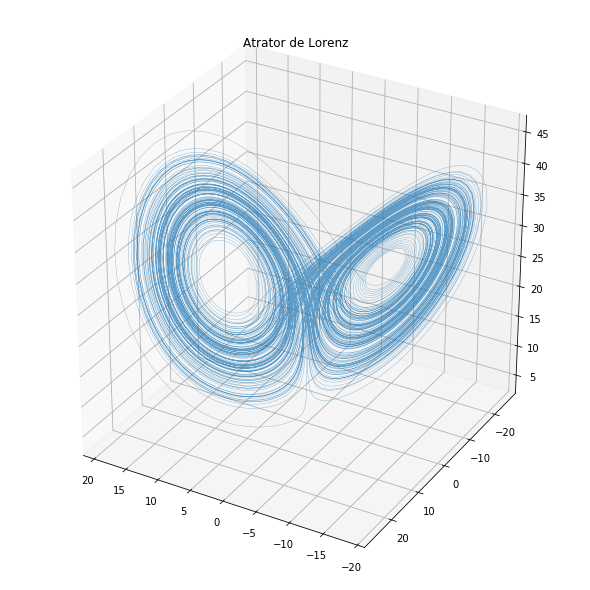

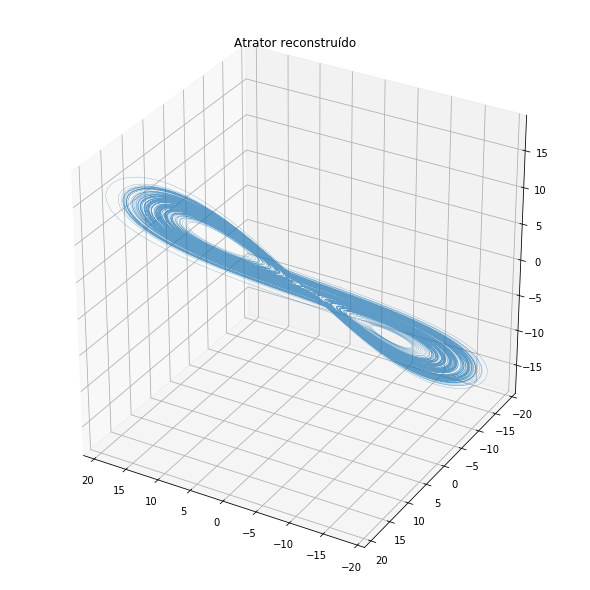

In [3]:
original_series = generate(LorenzODE())
plot3d(original_series, title="Atrator de Lorenz", angle=120)

reconstructed_series = psr(original_series[0], m=3, tau=3)
plot3d(reconstructed_series, title="Atrator reconstruído", angle=120)

#### Atrator de Rossler original e reconstruído

C:\Users\rrick\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:148: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


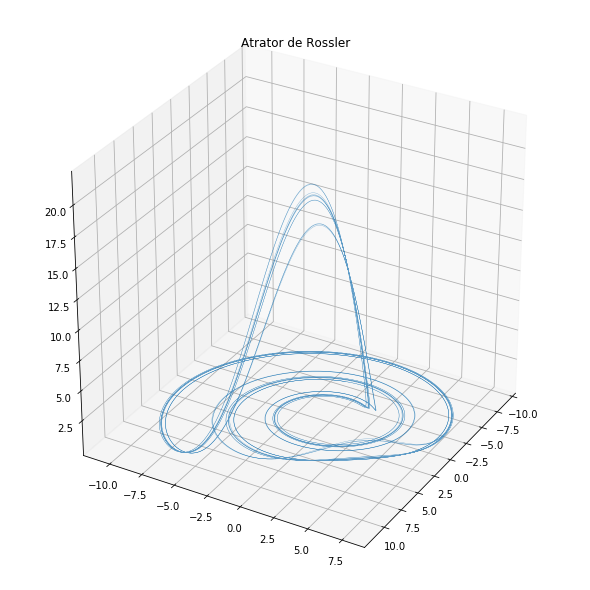

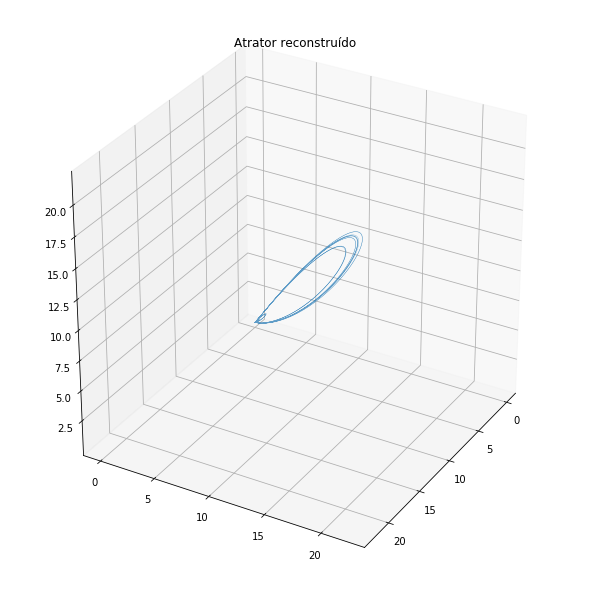

In [4]:
original_series = generate(RosslerODE())
plot3d(original_series, title="Atrator de Rossler")

reconstructed_series = psr(original_series[2], m=3, tau=3)
plot3d(reconstructed_series, title="Atrator reconstruído")

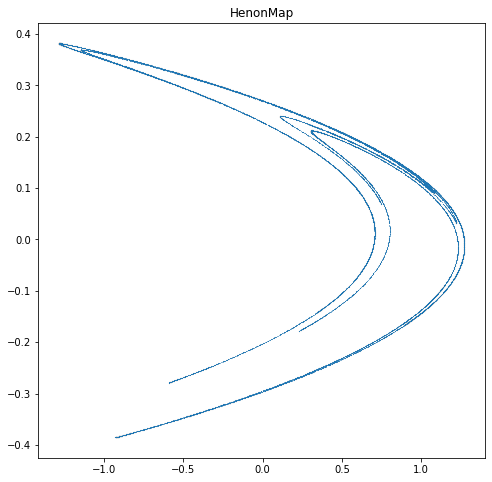

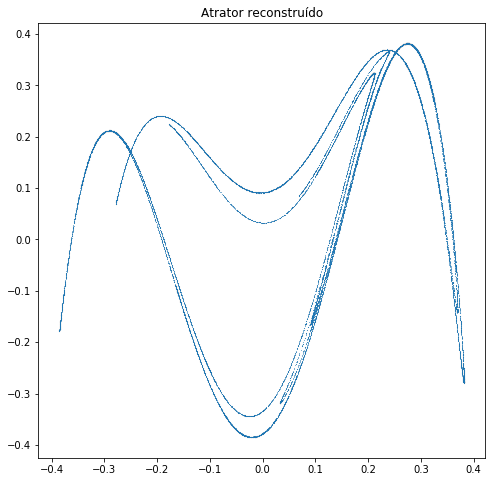

In [5]:
original_series = generate_discrete(HenonMap())
plot2d(original_series, title="HenonMap")

reconstructed_series = psr(original_series[1], m=2, tau=2)
plot2d(reconstructed_series, title="Atrator reconstruído")

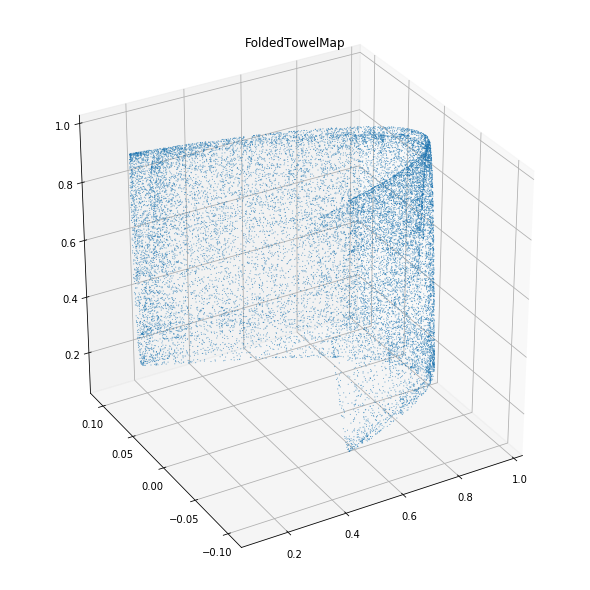

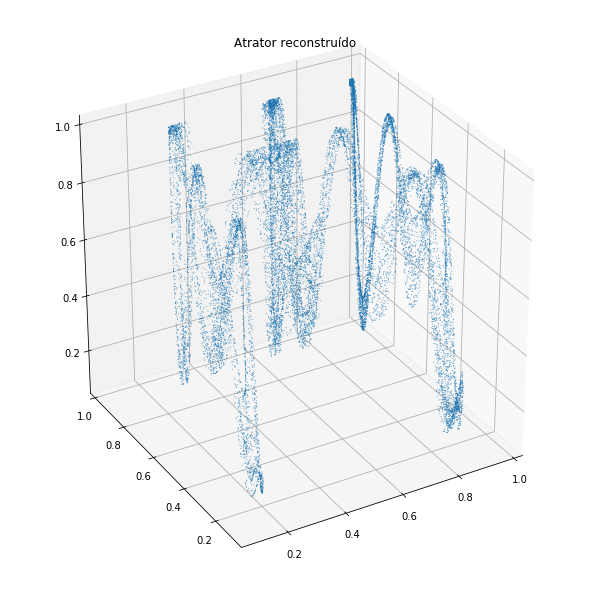

In [25]:
original_series = generate_discrete(FoldedTowelMap())
scatter3d(original_series, title="FoldedTowelMap", angle=240)

reconstructed_series = psr(original_series[0], m=3, tau=3)
scatter3d(reconstructed_series, title="Atrator reconstruído", angle=240)

### Exercício 3

Implemente os métodos de cálculo de expoente de Lyapunov apresentados no artigo do Parlitz, no arquivo denominado “Parlitz-LyapunovExponent”.

In [41]:
series = generate(RosslerODE())

In [4]:
import nolds

In [6]:
series.shape

(20000,)

C:\Users\aroni\Anaconda3\lib\site-packages\nolds\measures.py:240: RuntimeWarning: signal has very low mean frequency, setting min_tsep = 5000
  warnings.warn(msg.format(min_tsep), RuntimeWarning)


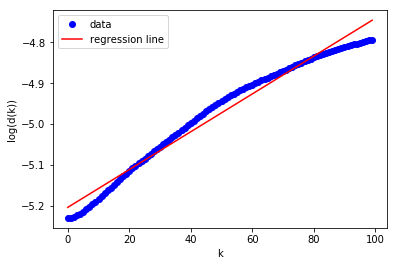

0.00463602962774303

In [43]:
nolds.lyap_r(series[2], debug_plot=True, trajectory_len=100)

In [69]:
import numpy as np
from numba import jit

#@jit(nopython=True, parallel = True)
def dist(series, i, j):
    """
    The Euclidian distance from two elements of series
    :param series: the complete time series;
    :param i: first element position from time series;
    :param j: second element position from time series;
    :return: the distance.
    """
    return np.linalg.norm(series[i] - series[j])

#@jit(nopython=True, parallel = True)
def logdist_pos(series, i, j, eta=1):
    """
    Log distance from two elements from a time series
    :param series: the complete time series
    :param i: first element position from time series
    :param j: second element position from time series
    :return: the distance.
    """
    if max(i, j) < len(series):
        distance = dist(series, i, j)
        return np.log(distance) if distance != 0 else None

# Set "nopython" mode for best performance, equivalent to @njit
#@jit(nopython=True, parallel = True) 
def nn(i, series, w=5):
    """
    Find the nearest neighbor from a time series element
    :param i: a element position from time series
    :param series: the complete time series
    :param w: Theiler window 'w' from Paralitz paper
    :return: the nearest neighbor position on series
    """
    #distances = np.max(series - series[i], axis=1)
    distances = np.apply_along_axis(np.linalg.norm, 1, series - series[i])
    
    max_dist = max(distances)
    for k in np.arange(max(0, i - w), w):
        distances[k] = max_dist
    
    return np.argmin(distances)

O maior expoente de Lyapunov corresponde ao coeficiente angular do gráfico da evolução das distâncias.

In [70]:
from numba import jit

# Set "nopython" mode for best performance, equivalent to @njit
#@jit(nopython=True, parallel = True) 
def distance_evolution(series, k=15):

    N=len(series)
    dlist=np.zeros((N,k))
       
    iis = np.arange(N)
    nns = np.array([nn(i, series) for i in iis])
    
    for j in range(k):
        dlist[:,j] = np.array([logdist_pos(series, i+j, nns[i]+j) for i in iis])
    
    return np.nanmean(dlist, axis=0)

Este gráfico deveria ficar semelhante à figura 1.2 do artigo do Paralitz

In [ ]:
series = generate(LorenzODE()).transpose()
dist_evo = distance_evolution(series, 15)
plt.plot(dist_evo)

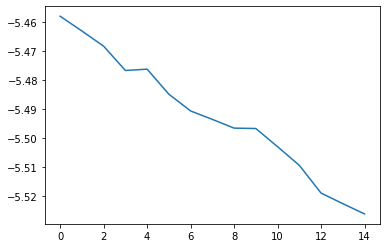

In [11]:
series = generate(RosslerODE()).transpose()
dist_evo = distance_evolution(series, 15)
plt.plot(dist_evo)

-1.5205028027093743


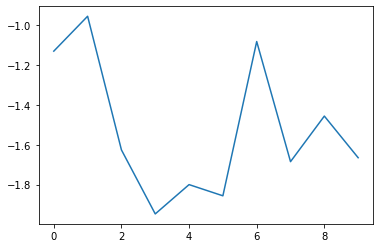

In [12]:
series = generate_discrete(HenonMap()).transpose()
dist_evo = distance_evolution(series, 10)
print(np.mean(dist_evo))
plt.plot(dist_evo)

Repetindo a tentativa, mas usando o cálculo da evolução de distâncias da internet.

In [13]:
# https://stackoverflow.com/questions/37908104/lyapunov-exponent-python-implementation
from numba import jit
@jit(nopython=True, parallel = True) # Set "nopython" mode for best performance, equivalent to @njit
def distance_evolution2(series, eps=0.01):
    N = len(series)
    lyapunovs = [[] for i in range(N)]

    for i in range(N):
        for j in range(i + 1, N):
            if np.abs(np.max(series[i] - series[j])) < eps:
                for k in range(min(N - i, N - j, 15)):
                    lyapunovs[k].append(logdist_pos(series, i+k, j+k))
    
    return lyapunovs#np.array([np.mean(l) for l in lyapunovs])

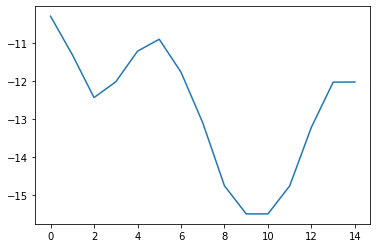

In [14]:
series = generate(LorenzODE()).transpose()
dist_evo = distance_evolution(series)
plt.plot(dist_evo)

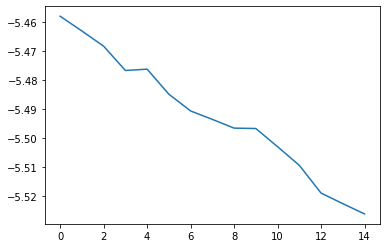

In [15]:
series = generate(RosslerODE()).transpose()
dist_evo = distance_evolution(series)
plt.plot(dist_evo)

-1.487633436714766


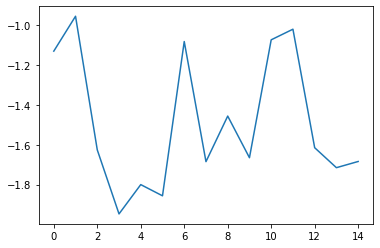

In [16]:
series = generate_discrete(HenonMap()).transpose()
dist_evo = distance_evolution(series)
print(np.mean(dist_evo))
plt.plot(dist_evo)

In [17]:
import math

def logdist(a,b):
    """
    Log distance for two scalars
    """
    return math.log(abs(a - b) + 1e-8, 2)

def lyapunov(series, m=2, tau=2, k=10):
    """
    Lyapunov exponents from series
    """
    ls = psr(series, m, tau)    
    growth = [logdist(ls[0, j + k], ls[1, j + k]) - logdist(ls[0, j], ls[1, j]) for j in range(0, ls.shape[1] - k, k)]

    return  np.mean(growth)

### Exercício 4

Aplique-os para os atratores de Henon, Lorenz e Rossler.

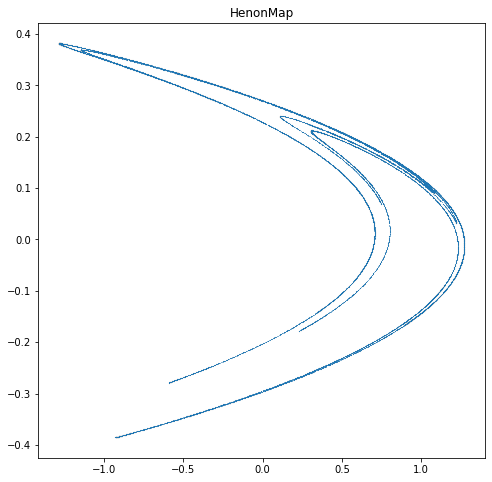

In [18]:
series = generate_discrete(HenonMap(), 1000)
plot2d(original_series, title="HenonMap")

### Exercício 5

Reproduza, na medida do possível, os resultados apresentados no referido artigo.

In [19]:
def remove_tail(serie,tail_size):
    if tail_size>0:
        return serie[:-tail_size]
    else:
        return serie[:]

def create_lagged_series(serie,qtd,lag_size=2):
    """
    Baseado no Takens Embedding Theorem
    :param serie: uma serie temporal
    :param lag_size: tamanho do atraso, também conhecido como tau
    :param qtd: número de séries 
    :returns: uma lista de séries atrasadas 
    """
    tail_size=(qtd-1)*lag_size
    series = [remove_tail(np.roll(serie, -i*lag_size),tail_size) for i in range(qtd)]
    return series


def heaviside_step(v):
    return 1 if v>0 else 0

def norm(a,b):
    s = np.array(a) - np.array(b)
    s = np.power(s, 2)
    s = np.sum(s)
    return np.sqrt(s)

def correlation(series, r,n):
    s=len(series)
    somatorio=0
    for i in range(n):
        for j in range(n):
            ti=[]
            tj=[]
            for k in range(s):
                ti.append(series[k][i])
                tj.append(series[k][j])
            somatorio+=heaviside_step(r-norm(ti,tj))
    c=(2/float((n*(n-1))))+somatorio
    return c

def is_like(a,b,limiar=0.5):
    k=abs(a-b)
    return k <= abs(limiar)

def find_saturation(m_list,v_list):

    v_list_len=len(v_list)
    m_list_len=len(m_list)

    if v_list_len!=m_list_len:
        raise ValueError("listas de tamanhos diferentes")

    if v_list_len<2:
        raise ValueError("lista menor menor que 2 ")

    # print("m_list",m_list)
    # print("v_list",v_list)

    m=None
    v_old=v_list[0]

    print('\tCalculando o limiar para definição da Dimensão')
    for i,v in enumerate(v_list[1:]):
        if is_like(v,v_old,v/100.0):
            m=m_list[max(0,i-1)]            
            break
        v_old=v_list[i]
    return m


def calc_attractor_dimension(serie,dim_min=1,dim_max=20):
    """
    Baseado no Grassberger-Procaccia Algorithm
    :param serie: uma serie temporal
    :returns: um float com a dimensão encontrada. Ou "-1" caso não encontre 
    """
    m=dim_min
    tau=1
    n=10
    v_list=[]
    m_list=list(range(1,dim_max+1))
    r=np.std(serie[:n])

    print("\tR={} (Desvio Padrão da serie de {} elementos)".format(r,n))
    for m in m_list:
        lagged_series=create_lagged_series(serie,m,lag_size=tau)
        c=correlation(lagged_series, r,n)
        v_list.append(np.log10(c)/np.log10(r))
        
    d = find_saturation(m_list,v_list)
    if d is not None:
        print("\tdimension:",d)
    else:
        print("\tdimension not found")
    return d

In [20]:
def generate(data_length, odes, state, parameters):
    data = np.zeros([state.shape[0], data_length])
    for i in range(5000):
        state = rk4(odes, state, parameters)
    for i in range(data_length):
        state = rk4(odes, state, parameters)
        data[:, i] = state
    return data


def rk4(odes, state, parameters, dt=0.01):
    k1 = dt * odes(state, parameters)
    k2 = dt * odes(state + 0.5 * k1, parameters)
    k3 = dt * odes(state + 0.5 * k2, parameters)
    k4 = dt * odes(state + k3, parameters)
    return state + (k1 + 2 * k2 + 2 * k3 + k4) / 6


def lorenz_generate(data_length):
    def lorenz_odes(state, parameters):
        x,y,z=state
        sigma, beta, rho=parameters
        return np.array([sigma * (y - x), x * (rho - z) - y, x * y - beta * z])
    return generate(data_length, lorenz_odes, \
        np.array([-8.0, 8.0, 27.0]), np.array([10.0, 8/3.0, 28.0]))

In [21]:
atrator_3d = lorenz_generate(2**14)
atrator_d0=atrator_3d[0]
calc_attractor_dimension(atrator_d0)

	R=1.4457369674451328 (Desvio Padrão da serie de 10 elementos)
	Calculando o limiar para definição da Dimensão
	dimension: 3


3

In [22]:
#series = generate(LorenzODE())
lyapunov(atrator_3d[2])

0.00026580580169537597

In [23]:
import pandas as pd

In [24]:
gold = pd.read_csv("golden_usd.csv")

In [25]:
create_lagged_series(gold.price.values,1,1)[0][:10]

array([34.73, 34.73, 34.73, 34.73, 34.73, 34.73, 34.73, 34.73, 34.73,
       34.73])

In [26]:
calc_attractor_dimension(gold.price,dim_min=1,dim_max=20)

	R=7.105427357601002e-15 (Desvio Padrão da serie de 10 elementos)
	Calculando o limiar para definição da Dimensão
	dimension: 1


1

C:\Users\rrick\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:148: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


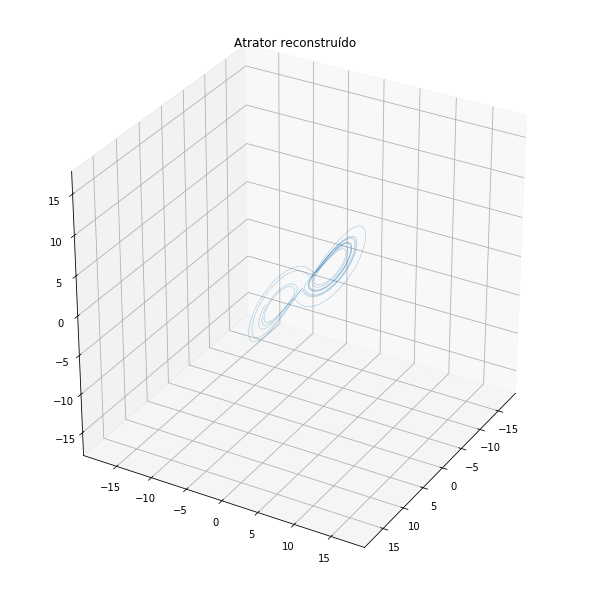

In [27]:
#atrator_d0=gold.price
atrator_d0=lorenz_generate(1000)[0]


#por que esse valor? Aqui foi arbitrário. Existem métodos para isso, não explorados aqui 
tau=3;

#a partir de 1 dimensão do atrator, criamos 3 séries com atraso 0,tau, 2*tau
# data_lag0 = atrator_d0

# data_lag1 = numpy.roll(data_lag0, -tau)[:-tau]

# data_lag2 = numpy.roll(data_lag1, -tau)[:-tau]

# #imprime o atrator, pronto. Reconstruído
# plot3d([data_lag0[:-2*tau], data_lag1[:-tau], data_lag2],"Atrator reconstruído")
lagged_series=create_lagged_series(atrator_d0,3,3)
plot3d(lagged_series,"Atrator reconstruído")

In [28]:
np.array(lagged_series)[:3,:]

array([[  6.80970144,   7.23853572,   7.69148258, ..., -14.12892981,
        -14.33963763, -14.44422074],
       [  8.1671259 ,   8.66326011,   9.17673486, ..., -14.4351631 ,
        -14.30890661, -14.06626752],
       [  9.70330045,  10.23746705,  10.77239593, ..., -13.71248343,
        -13.25687729, -12.71218463]])

In [29]:
def lyap_from_serie(serie):

    lagged_series=create_lagged_series(serie,2,2)
    y=lagged_series[0]
    z=lagged_series[1]
    size=len(lagged_series[1])
    s=0
    k=10
    j=0
    while j<(size-k):
        L=abs(y[j]-z[j])
        L_linha=abs(y[j]-z[j+k])
        s+=math.log((L_linha+1e-6)/float(L+1e-6), 2)
        j+=k

    lyap=s/float(size)

    return  lyap

In [30]:
lyap_from_serie(np.random.rand(100))

0.014334801532727134

C:\Users\rrick\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:148: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


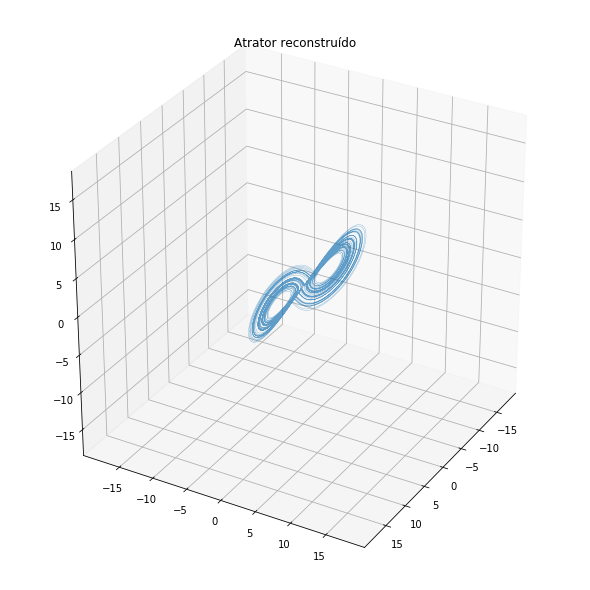

In [31]:
atrator_d0=lorenz_generate(2**13)[0,:]


#por que esse valor? Aqui foi arbitrário. Existem métodos para isso, não explorados aqui 
tau=3;

#a partir de 1 dimensão do atrator, criamos 3 séries com atraso 0,tau, 2*tau
# data_lag0 = atrator_d0

# data_lag1 = numpy.roll(data_lag0, -tau)[:-tau]

# data_lag2 = numpy.roll(data_lag1, -tau)[:-tau]

# #imprime o atrator, pronto. Reconstruído
# plot3d([data_lag0[:-2*tau], data_lag1[:-tau], data_lag2],"Atrator reconstruído")
lagged_series=create_lagged_series(atrator_d0,9,tau)
plot3d(lagged_series,"Atrator reconstruído")

In [32]:
# plot periodic orbits and iterations for a map  
# or plot the lyapunov exponent for the map
# 
import numpy as np
import matplotlib.pyplot as plt

# Here is our map f(x) 
def ourmap(x,r):
    return r - x*x

# derivative of f(x) or f'(x)
def deriv_ourmap(x,r):
    return -2.0*x

# fill an array with iteration n1 to n2 of the map starting with x0
# and with parameter r
def fillit(n1,n2,x0,r):
    x = x0  # initial x value
    z = np.linspace(0.0,1.0,n2-n1)  # create an array
    for i in range(0,n1):   # do n1 iterations
        x = ourmap(x,r)

    for i in range(0,n2-n1):   # fill n2-n1 iterations
        x = ourmap(x,r)
        z[i] = x

    return z  # returning the array

# compute lyapunov exponent by averaging log of derivatives
# with parameter r, initial condition x0, using iterations n1-n2
def lyapunov(n1,n2,x0,r):
    x = x0  # initial x value
    for i in range(0,n1):   # do n1 iterations
        x = ourmap(x,r)

    sum = 0.0
    for i in range(0,n2-n1):   # for n2-n1 iterations sum derivatives
        dd = deriv_ourmap(x,r)
        sum += np.log(np.abs(dd) + 1e-10)
        x = ourmap(x,r)

    return sum/(n2-n1)  # returning average of derivatives


# plot the iterated map (periodic attractors) for nr number of r values
# here x0 is initial x
# do the computation for r in r_min to r_max
def mkplot(r_min,r_max,x0,nr): 
    rarr = np.linspace(r_min,r_max,nr)  
    n1=100  #specify iteration range
    n2=200  
    for i in range(0,nr):  
        r = rarr[i]
        y=fillit(n1,n2,x0,r)  # get the array of iterations
        x=y*0.0 + r   # dummy x value is all r 
        plt.plot(x,y,'ko',markersize=1)   # k=black, plot small points

# compute the lyapunov exponent between r_min and r_max
# for nr of r values
# and using initial condition x0
def lyapunovrange(r_min,r_max,x0,nr):
    rarr = np.linspace(r_min,r_max,nr)  
    n1=400  #specify iteration range
    n2=800  
    LL=rarr*0.0   # set up an array 
    for i in range(0,nr):  
        r = rarr[i]
        LL[i] = lyapunov(n1,n2,x0,r)
    plt.plot(rarr,LL,'ro',markersize=2)   # r=red, plot small points

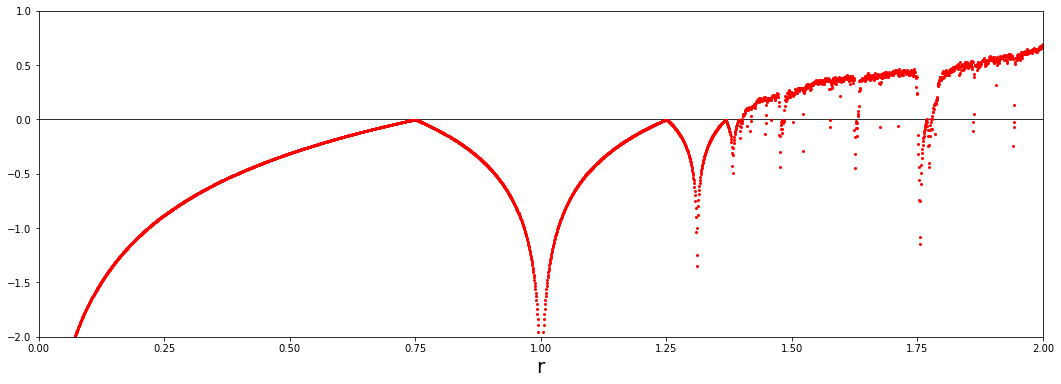

In [33]:
# set up the plot
plt.figure(figsize=(18,6))
plt.xlabel(r'r',fontsize=20)
plt.axhline(0, color='black', lw=0.8)
r_min=0.0  # range
r_max=2.0
x0=0.1    #initial condition
# this makes a plot of attracting points
#plt.axis([r_min, r_max,-2, 2.0])
#mkplot(r_min,r_max,x0,1000)

# plots the lyapunov exponent
plt.axis([r_min, r_max,-2, 1.0])
lyapunovrange(r_min,r_max,x0,3000) 